## Data Visualization 

### Import data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read data 
df = pd.read_csv('sensor_neu.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True) # drop index column 
df['dateTime'] = pd.to_datetime(df.dateTime) # parse timestamps
df = df.rename(columns={'output (kWh)': 'Output', 'basicConsumption (kWh)': 'Grundlast', 'managementConsumption (kWh)': 'Verwaltung', 'productionConsumption (kWh)': 'Produktion'}) # rename columns

# netzbezug
df['balance'] = (df['Grundlast'] + df['Verwaltung'] + df['Produktion']) - df['Output']

### Energieverbrauch wöchentlich

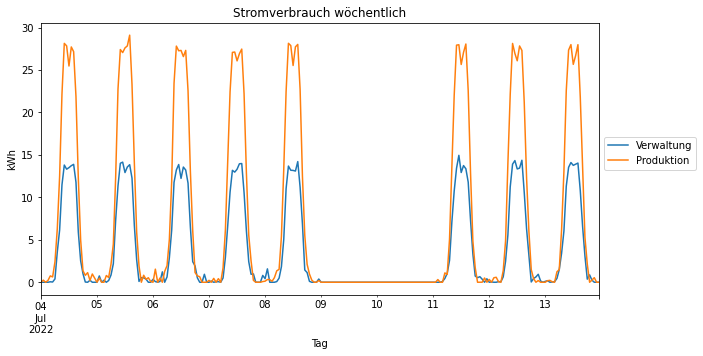

In [2]:
df_week = df[(df['dateTime'] >= '2022-07-04 00:00:00') & (df['dateTime'] <= '2022-07-13 23:00:00')]
df_week = df_week[['dateTime', 'Verwaltung', 'Produktion']]

ax = df_week.plot(x='dateTime', kind="line", figsize=(10,5))
ax.set_xlabel("Tag")
ax.set_ylabel("kWh")
ax.set_title('Stromverbrauch wöchentlich')
ax.legend(bbox_to_anchor=(1.0, 0.6))


plt.show()

### Energieverbrauch täglich

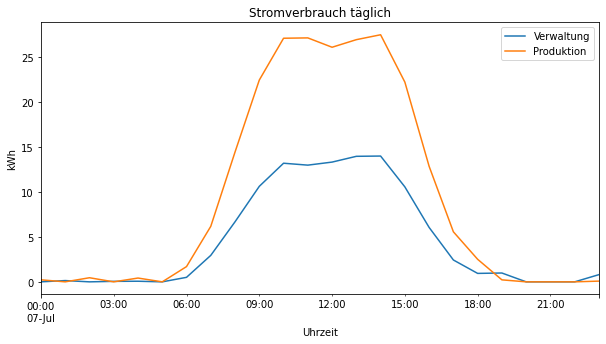

In [3]:
df_day = df[(df['dateTime'] >= '2022-07-07 00:00:00') & (df['dateTime'] <= '2022-07-07 23:00:00')]
df_day = df_day[['dateTime', 'Verwaltung', 'Produktion']]

ax = df_day.plot(x='dateTime', kind="line", figsize=(10,5))
ax.set_xlabel("Uhrzeit")
ax.set_ylabel("kWh")
ax.set_title('Stromverbrauch täglich')

plt.show()

### Netzbezug Termin 2

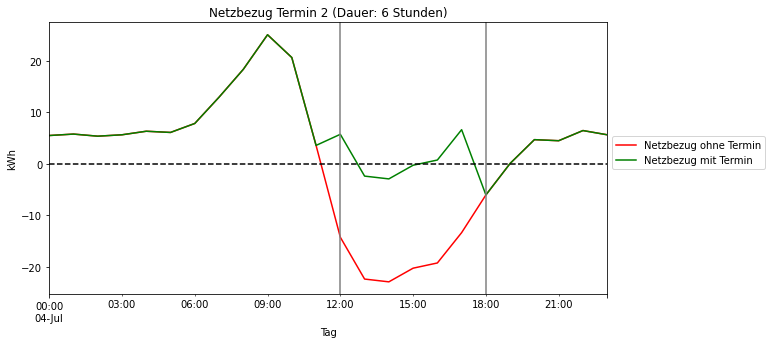

In [3]:
df_balance = df[(df['dateTime'] >= '2022-07-04 00:00:00') & (df['dateTime'] <= '2022-07-04 23:00:00')]
df_balance = df_balance[['dateTime', 'balance']]
df_balance['Netzbezug mit Termin'] = np.where((df_balance['dateTime']>='2022-07-04 12:00:00')&(df_balance['dateTime'] <= '2022-07-04 17:00:00'), df_balance['balance']+20, df_balance['balance'])
df_balance = df_balance.rename(columns={'balance': 'Netzbezug ohne Termin'}) # rename columns

ax = df_balance.plot(x='dateTime', kind="line", figsize=(10,5), color=['r','g'], linestyle='-')
ax.set_xlabel("Tag")
ax.set_ylabel("kWh")
ax.set_title('Netzbezug Termin 2 (Dauer: 6 Stunden)')
ax.legend(bbox_to_anchor=(1.0, 0.6))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axvline(x='2022-07-04 12:00:00', color='grey', linestyle='-')
plt.axvline(x='2022-07-04 18:00:00', color='grey', linestyle='-')
plt.show()